In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.applications import Xception
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten, Dropout
from keras.layers import (
    Dropout,
    Conv2D,
    Flatten,
    Dense,
    MaxPooling2D,
    BatchNormalization,
)
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator

Images in Closed:


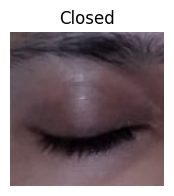

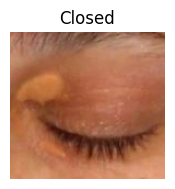

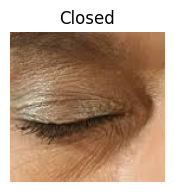

Total images in Closed: 617

Images in no_yawn:


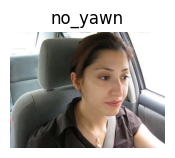

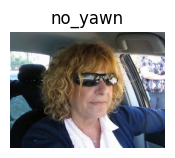

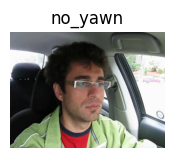

Total images in no_yawn: 616

Images in Open:


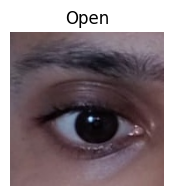

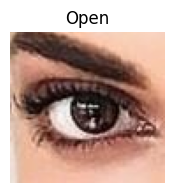

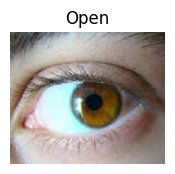

Total images in Open: 617

Images in yawn:


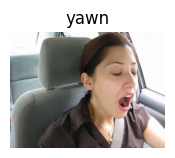

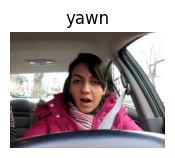

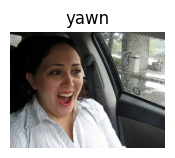

Total images in yawn: 617



In [32]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_and_count_images_from_folder(folder_path):
    for subdir in os.listdir(folder_path):
        subdir_path = os.path.join(folder_path, subdir)
        if os.path.isdir(subdir_path):
            print(f"Images in {subdir}:")
            image_count = 0

            for image_file in os.listdir(subdir_path):
                if image_file.endswith('.jpg') or image_file.endswith('.png'):
                    image_path = os.path.join(subdir_path, image_file)
                    img = mpimg.imread(image_path)

                    plt.figure(figsize=(2, 2))
                    plt.imshow(img)
                    plt.title(subdir)
                    plt.axis('off')
                    plt.show()

                    image_count += 1
                    if image_count >= 3:  # Display only the first 3 images for each class
                        break

            # Count and print the total number of images in the class
            total_images = len(os.listdir(subdir_path))
            print(f"Total images in {subdir}: {total_images}\n")

# Provide the correct path to the 'train' folder
folder_path = './dataset_new/train'
show_and_count_images_from_folder(folder_path)


In [33]:
model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(24, 24, 1)),
        MaxPooling2D(pool_size=(1, 1)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(1, 1)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(1, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(4, activation="softmax"),
    ]
)

In [41]:
from keras.preprocessing import image
def generator(
    dir,
    gen=image.ImageDataGenerator(rescale=1.0 / 255),
    shuffle=True,
    batch_size=1,
    target_size=(24, 24),
    class_mode="categorical",
):

    return gen.flow_from_directory(
        dir,
        batch_size=batch_size,
        shuffle=shuffle,
        color_mode="grayscale",
        class_mode=class_mode,
        target_size=target_size,
    )

In [43]:
BS = 32
TS = (24, 24)
train_batch = generator("./dataset_new/train", shuffle=True, batch_size=BS, target_size=TS)
valid_batch = generator("./dataset_new/test", shuffle=True, batch_size=BS, target_size=TS)
SPE = len(train_batch.classes) // BS
VS = len(valid_batch.classes) // BS
print(SPE, VS)

img, labels = next(train_batch)
print(img.shape)

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.
77 13
(32, 24, 24, 1)


In [34]:
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

In [35]:
train_path = './dataset_new/train'
validation_path = './dataset_new/test'

In [36]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(24, 24),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',  # or 'rgb' for color images
    shuffle=True,
    subset='training'  # specify 'training' for the training set
)

Found 1975 images belonging to 4 classes.


In [37]:
validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(24, 24),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False,
    subset='validation'
)

Found 84 images belonging to 4 classes.


In [44]:
model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

In [45]:
model.fit(
    train_batch,
    validation_data=valid_batch,
    epochs=50,
    steps_per_epoch=SPE,
    validation_steps=VS,
)

Epoch 1/50
77/77 [==============================] - 14s 178ms/step - loss: 0.2112 - accuracy: 0.9396 - val_loss: 0.1903 - val_accuracy: 0.9207
Epoch 2/50
77/77 [==============================] - 6s 74ms/step - loss: 0.0805 - accuracy: 0.9692 - val_loss: 0.2657 - val_accuracy: 0.9183
Epoch 3/50
77/77 [==============================] - 6s 74ms/step - loss: 0.0569 - accuracy: 0.9795 - val_loss: 0.2452 - val_accuracy: 0.9207
Epoch 4/50
77/77 [==============================] - 6s 75ms/step - loss: 0.0477 - accuracy: 0.9832 - val_loss: 0.2282 - val_accuracy: 0.9399
Epoch 5/50
77/77 [==============================] - 6s 75ms/step - loss: 0.0357 - accuracy: 0.9869 - val_loss: 0.1937 - val_accuracy: 0.9375
Epoch 6/50
77/77 [==============================] - 6s 74ms/step - loss: 0.0322 - accuracy: 0.9864 - val_loss: 0.1637 - val_accuracy: 0.9495
Epoch 7/50
77/77 [==============================] - 6s 75ms/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.2214 - val_accuracy: 0.9375
Epoch 8/50


In [46]:
model.save("./Model_Final.h5", overwrite=True)

3/3 [==============================] - 0s 69ms/step
Accuracy: 0.9880952380952381


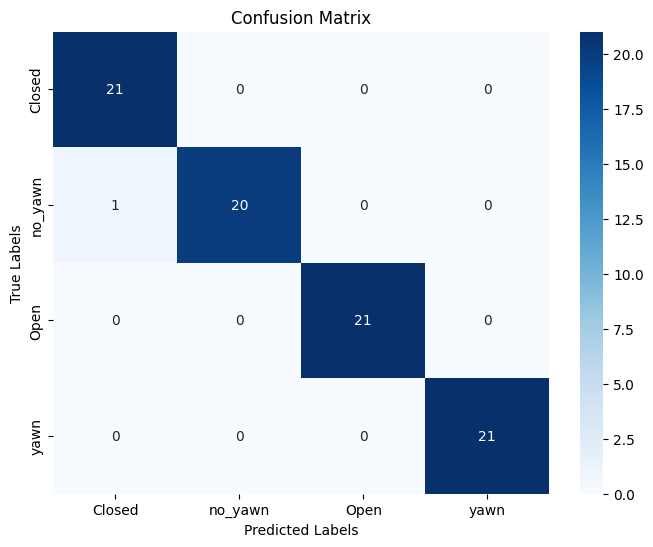

Confusion Matrix:
[[21  0  0  0]
 [ 1 20  0  0]
 [ 0  0 21  0]
 [ 0  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        21

   micro avg       0.99      0.99      0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84
 samples avg       0.99      0.99      0.99        84



In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.utils import to_categorical
import seaborn as sns


# Assuming you have a model named 'cnn_model' and validation_generator for evaluation
# cnn_model is the CNN model you've trained using the second code snippet

# Predict the classes for the validation set
y_pred_probs = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get the true labels
y_true = validation_generator.classes

# Convert the true labels to one-hot encoded format (required for classification_report)
y_true_one_hot = to_categorical(y_true, num_classes=4)

# Convert the predicted classes to one-hot encoded format (required for classification_report)
y_pred_one_hot = to_categorical(y_pred_classes, num_classes=4)

# Calculate and print accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Accuracy: {accuracy}')

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
class_labels = ['Closed', 'no_yawn', 'Open', 'yawn']
conf_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot the heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
print('Confusion Matrix:')
print(conf_matrix)

# Calculate and print classification report with precision, recall, and F1 score
class_report = classification_report(y_true_one_hot, y_pred_one_hot)
print('Classification Report:')
print(class_report)


In [52]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   ----- --------------------------------- 41.0/294.9 kB 495.5 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 328.2 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 476.3 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 476.3 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 425.1 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 425.1 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 355.0 kB/s eta 0:00:01
   --------------------- ---------------- 163.8/294.9 kB 364.0 kB/s eta 0:00:01
   --------------------- ---------------- 163.8/294.9 kB 364.0 kB/s